In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Análisis Exploratorio de Datos (EDA)

*Importacion y limpieza de datos*

In [73]:
# Cargo los datos de la pestaña "hechos"
hechos_df = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')

In [74]:

# Verifico si hay valores NaN en el DataFrame
valores_nulos = hechos_df.isna()

# Cuento cantidad de valores NaN por columna
cantidad_valores_nulos_por_columna = valores_nulos.sum()

# Muestro columnas con valores NaN y la cantidad de NaN en cada una
print(cantidad_valores_nulos_por_columna)

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
CALLE                      1
ALTURA                   567
CRUCE                    171
DIRECCION NORMALIZADA      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


In [75]:
hechos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HH                     696 non-null    object        
 7   LUGAR_DEL_HECHO        696 non-null    object        
 8   TIPO_DE_CALLE          696 non-null    object        
 9   CALLE                  695 non-null    object        
 10  ALTURA                 129 non-null    float64       
 11  CRUCE                  525 non-null    object        
 12  DIRECCION NORMALIZADA  688 non-null    object        
 13  COMUN

In [76]:
#Reemplazo todos los valores NaN de calle, cruce, Altura y direccion por "Desconocido"
hechos_df['CALLE'].fillna('Desconocido', inplace=True)
hechos_df['CRUCE'].fillna('Desconocido', inplace=True)
hechos_df['DIRECCION NORMALIZADA'].fillna('Desconocido', inplace=True)
hechos_df['ALTURA'].fillna('Desconocido', inplace=True)


In [77]:
# Renombro columnas para tener mejor idea de los valores de las columnas
hechos_df.rename(columns={'AAAA': 'AÑO'}, inplace=True)
hechos_df.rename(columns={'MM': 'MES'}, inplace=True)
hechos_df.rename(columns={'DD': 'DIA'}, inplace=True)
hechos_df.rename(columns={'HH': 'FRANJA_HORARIA'}, inplace=True)

In [78]:
# Chequeo resultado
hechos_df

,ID,N_VICTIMAS,FECHA,AÑO,MES,DIA,FRANJA_HORARIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,ALTURA,CRUCE,DIRECCION NORMALIZADA,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1969-12-31 18:00:42.370,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Desconocido,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1969-12-31 18:00:42.371,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",Desconocido,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1969-12-31 18:00:42.372,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,Desconocido,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1969-12-31 18:00:42.379,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,Desconocido,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.68093,MOTO-SD,MOTO,SD
4,2016-0005,1,1969-12-31 18:00:42.390,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,Desconocido,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,1969-12-31 18:00:44.543,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,Desconocido,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,1969-12-31 18:00:44.550,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",Desconocido,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,1969-12-31 18:00:44.560,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,Desconocido,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,1969-12-31 18:00:44.545,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,Desconocido,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [79]:

# Verifico si quedaron si hay valores NaN en el DataFrame
valores_nulos = hechos_df.isna()

# Cuento cantidad de valores NaN por columna
cantidad_valores_nulos_por_columna = valores_nulos.sum()

# Muestro las columnas con valores NaN y la cantidad de NaN en cada una
print(cantidad_valores_nulos_por_columna)


ID                       0
N_VICTIMAS               0
FECHA                    0
AÑO                      0
MES                      0
DIA                      0
FRANJA_HORARIA           0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
CALLE                    0
ALTURA                   0
CRUCE                    0
DIRECCION NORMALIZADA    0
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
PARTICIPANTES            0
VICTIMA                  0
ACUSADO                  0
dtype: int64


In [81]:
# Cargo los datos de la pestaña "VICTIMAS"
victimas_df = pd.read_excel("homicidios.xlsx", sheet_name= "VICTIMAS")

In [82]:
victimas_df

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1969-12-31 18:00:42.370,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1969-12-31 18:00:42.370000
1,2016-0002,1969-12-31 18:00:42.371,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1969-12-31 18:00:42.371000
2,2016-0003,1969-12-31 18:00:42.372,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1969-12-31 18:00:42.372000
3,2016-0004,1969-12-31 18:00:42.379,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1969-12-31 18:00:42.390,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,1969-12-31 18:00:42.401000
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,1969-12-31 18:00:44.542,2021,12,12,PEATON,PEATON,FEMENINO,50,1969-12-31 18:00:44.542000
713,2021-0093,1969-12-31 18:00:44.543,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,1969-12-31 18:00:44.548000
714,2021-0094,1969-12-31 18:00:44.550,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,1969-12-31 18:00:44.550000
715,2021-0095,1969-12-31 18:00:44.560,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,1969-12-31 18:00:44.563000


In [83]:
# Renombro columnas para tener mejor idea de los valores de las columnas
victimas_df.rename(columns={'AAAA': 'AÑO'}, inplace=True)
victimas_df.rename(columns={'MM': 'MES'}, inplace=True)
victimas_df.rename(columns={'DD': 'DIA'}, inplace=True)

In [84]:
# Verifico valores faltantes en el DataFrame "víctimas"
print(victimas_df.isnull().sum())

# Identifico registros duplicados en el DataFrame "víctimas"
duplicados_victimas = victimas_df.duplicated().sum()

print("Registros duplicados en 'víctimas':", duplicados_victimas) #No hay valores nulos ni duplicados.

ID_hecho               0
FECHA                  0
AÑO                    0
MES                    0
DIA                    0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64
Registros duplicados en 'víctimas': 0


*Análisis estadísticos básicos y visualizaciones para comprender los datos*

In [85]:
# Estadísticas resumidas para columnas numéricas en "hechos"
print(hechos_df.describe())

# Estadísticas resumidas para columnas numéricas en "víctimas"
print(victimas_df.describe())

       N_VICTIMAS                          FECHA          AÑO         MES  \
count  696.000000                            696   696.000000  696.000000   
mean     1.030172  1969-12-31 18:00:43.357216955  2018.188218    6.692529   
min      1.000000     1969-12-31 18:00:42.370000  2016.000000    1.000000   
25%      1.000000     1969-12-31 18:00:42.827500  2017.000000    4.000000   
50%      1.000000     1969-12-31 18:00:43.293500  2018.000000    7.000000   
75%      1.000000     1969-12-31 18:00:43.834250  2020.000000   10.000000   
max      3.000000     1969-12-31 18:00:44.560000  2021.000000   12.000000   
std      0.179393                            NaN     1.683754    3.571309   

              DIA      COMUNA  
count  696.000000  696.000000  
mean    15.936782    7.425287  
min      1.000000    0.000000  
25%      9.000000    4.000000  
50%     16.000000    8.000000  
75%     23.000000   11.000000  
max     31.000000   15.000000  
std      8.639646    4.387050  
                  

Visualización de distribución de edades en "víctimas"

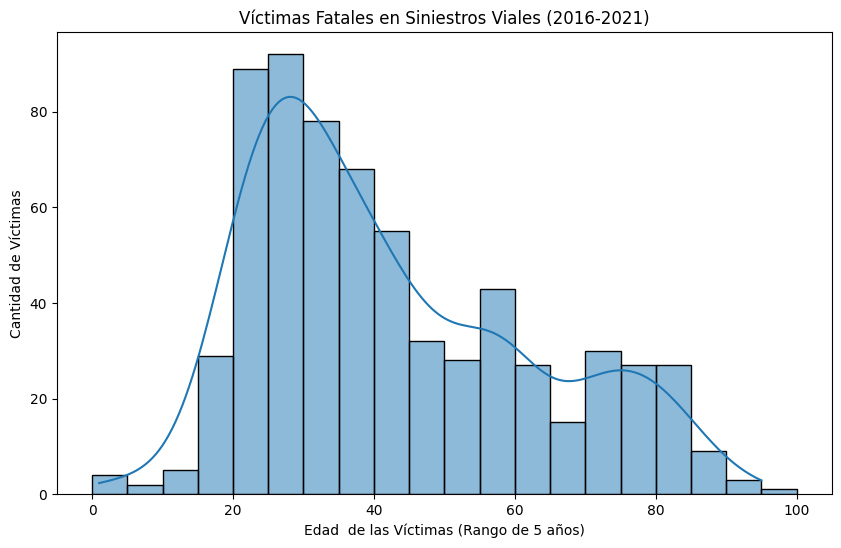

In [86]:
# Visualización de distribución de edades en "víctimas"

# Creo una copia temporal del DataFrame para la visualización
victimas_df_temp = victimas_df.copy()

# Filtro valores 'SD' en la copia temporal
victimas_df_temp = victimas_df_temp[victimas_df_temp['EDAD'] != 'SD']

# Convierto la columna 'EDAD' a tipo numérico en la copia temporal
#victimas_df_temp['EDAD'] = pd.to_numeric(victimas_df_temp['EDAD'])

# Creo el histograma con un rango de 5 años
plt.figure(figsize=(10, 6))
sns.histplot(data=victimas_df_temp, x='EDAD', bins=range(0, 101, 5), kde=True)
plt.title('Víctimas Fatales en Siniestros Viales (2016-2021)')
plt.xlabel('Edad  de las Víctimas (Rango de 5 años)')
plt.ylabel('Cantidad de Víctimas')
plt.show()



La mayoria de las victimas fatales en el periodo comprendido de 2016 a 2021 estuvieron en el rango de 20 a 45 años, siendo el rango de 25 a 30 años el pico mas alto. 

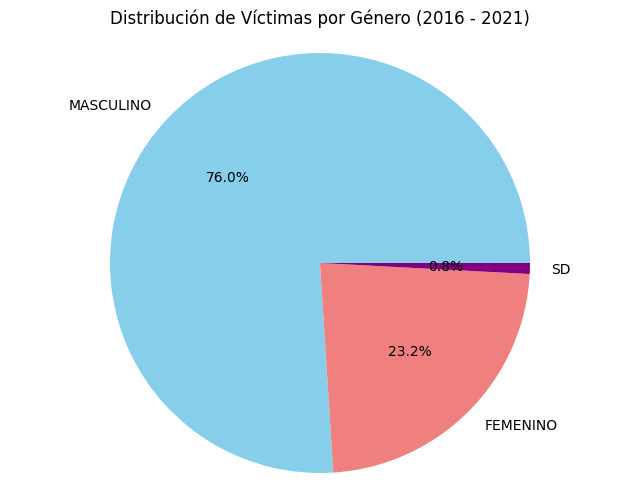

In [108]:
# Calculo de la cantidad de víctimas por género
victimas_por_genero = victimas_df['SEXO'].value_counts()

# Creo gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(victimas_por_genero, labels=victimas_por_genero.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'purple'])
plt.title('Distribución de Víctimas por Género (2016 - 2021)')
plt.axis('equal')  # Para que el gráfico sea un círculo en lugar de una elipse
plt.show()

El 76% de las victimas fatales en el periodo comprendido de 2016 a 2021 son de genero masculino, mientras que el 23.2% es de genero femenino. Hay un 0.8% sin identificar.

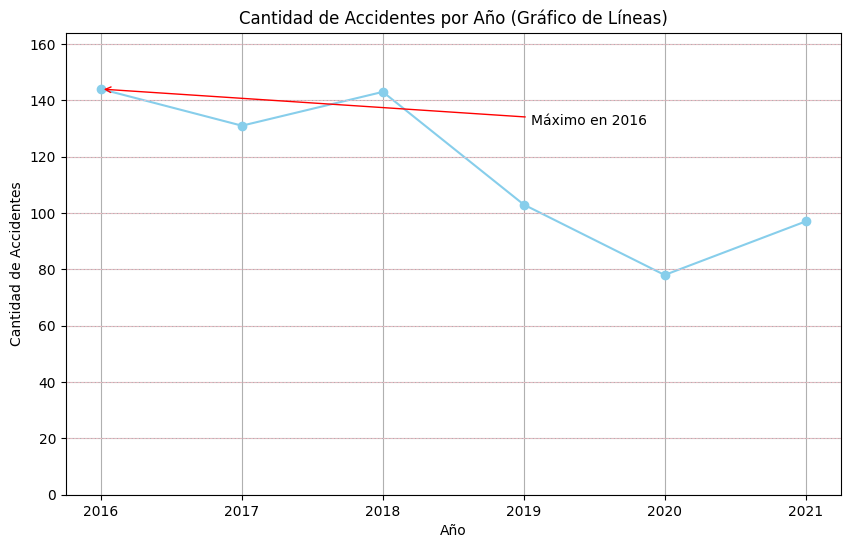

In [92]:
# Agrupo los datos por año y cuenta la cantidad de accidentes en cada año
accidentes_por_anio = hechos_df.groupby('AÑO')['ID'].count()


# Creo un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(accidentes_por_anio.index, accidentes_por_anio.values, marker='o', linestyle='-', color='skyblue')

# Configuro  límites y el paso del eje Y
plt.ylim(0, max(accidentes_por_anio.values) + 20)
plt.yticks(range(0, max(accidentes_por_anio.values) + 20, 20))

# Agrego marcas en el eje Y (rayitas tipo regla)
for y in range(0, max(accidentes_por_anio.values) + 20, 20):
    plt.axhline(y, color='pink', linestyle='--', linewidth=0.5)

# Busco el año con el máximo número de accidentes
anio_max_accidentes = accidentes_por_anio.idxmax()

# Calculo la posición de la anotación
max_accidentes = accidentes_por_anio.max()
pos_x = anio_max_accidentes
pos_y = max_accidentes 

# Agregouna anotación para el máximo
plt.annotate(f'Máximo en {anio_max_accidentes}', (pos_x, pos_y), 
             xytext=(0.6, 0.8), textcoords='axes fraction',
             arrowprops=dict(arrowstyle="->", color='red'))

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes por Año (Gráfico de Líneas)')

# Gráfico
plt.grid(True)
plt.show()


De acuerdo a este grafico la mayoria de accidentes ocurrieron en 2016 y 2018.

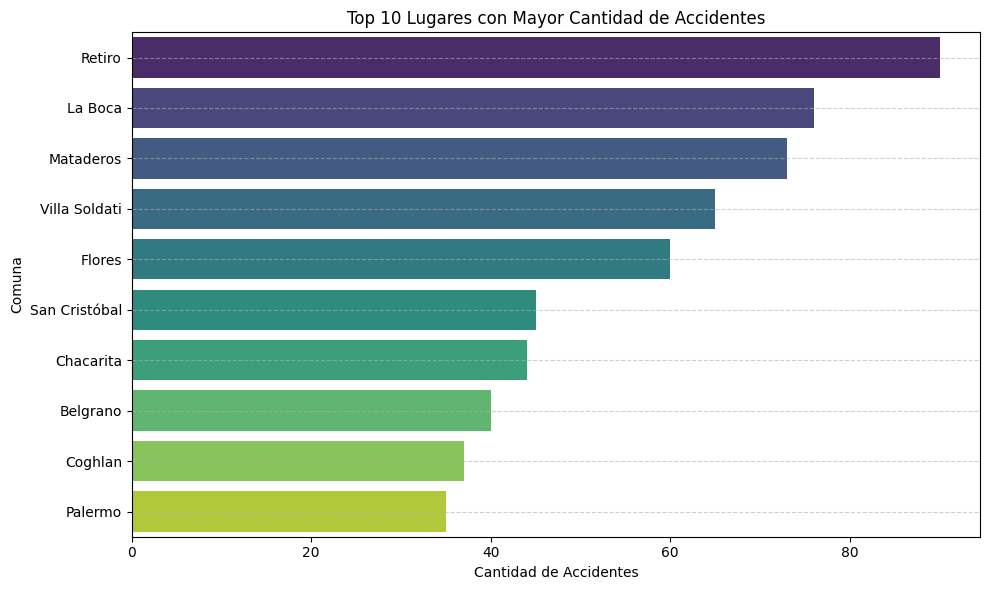

In [101]:
# Diccionario que asocia números de comunas con barrios
comunas_barrios = {
    1: 'Retiro',
    2: 'Recoleta',
    3: 'San Cristóbal',
    4: 'La Boca',
    5: 'Almagro',
    6: 'Caballito',
    7: 'Flores',
    8: 'Villa Soldati',
    9: 'Mataderos',
    10: 'Floresta',
    11: 'Villa General Mitre',
    12: 'Coghlan',
    13: 'Belgrano',
    14: 'Palermo',
    15: 'Chacarita'
}

# Remapeo las comunas en el DataFrame
hechos_df['COMUNA'] = hechos_df['COMUNA'].map(comunas_barrios)

# Cuento cantidad de accidentes por lugar del hecho
top_lugares = hechos_df['COMUNA'].value_counts().head(10)

# Creo un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_lugares.values, y=top_lugares.index, palette='viridis')

# Etiquetas y título
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Comuna')
plt.title('Top 10 Lugares con Mayor Cantidad de Accidentes')

# Muestro el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Agregue un diccionario con los nombres de las comunas para mostrar las 10 comunas en donde mas ocurrieron accidentes en el periodo 2016 - 2021 

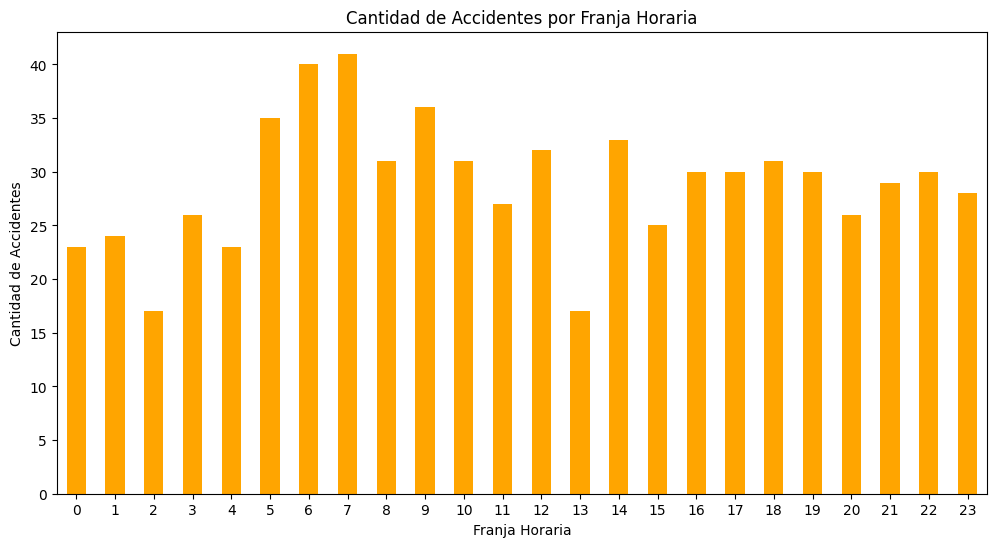

In [109]:
# Lleno las celdas vacías en la columna 'FRANJA_HORARIA' con 'SD'
hechos_df['FRANJA_HORARIA'].fillna('SD', inplace=True)

# Filtro los datos que no son 'SD' (sin datos)
hechos_df = hechos_df[hechos_df['FRANJA_HORARIA'] != 'SD']

# Conviertola columna 'FRANJA_HORARIA' a tipo numérico
hechos_df['FRANJA_HORARIA'] = pd.to_numeric(hechos_df['FRANJA_HORARIA'], errors='coerce')

# Elimino filas con valores nulos en 'FRANJA_HORARIA'
hechos_df.dropna(subset=['FRANJA_HORARIA'], inplace=True)

# Agrupo los datos por franja horaria y contar la cantidad de accidentes en cada franja
franja_horaria_counts = hechos_df['FRANJA_HORARIA'].value_counts().sort_index()

# Creo un gráfico de barras
plt.figure(figsize=(12, 6))
franja_horaria_counts.plot(kind='bar', color='orange')
plt.title('Cantidad de Accidentes por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=0)  # No rotar etiquetas del eje x (ya están en formato numérico)

plt.show()




Este grafico muestra que la mayoria de los accidentes entre 2016 y 2021 sucedieron entre las 6 y 7 de la mañana.

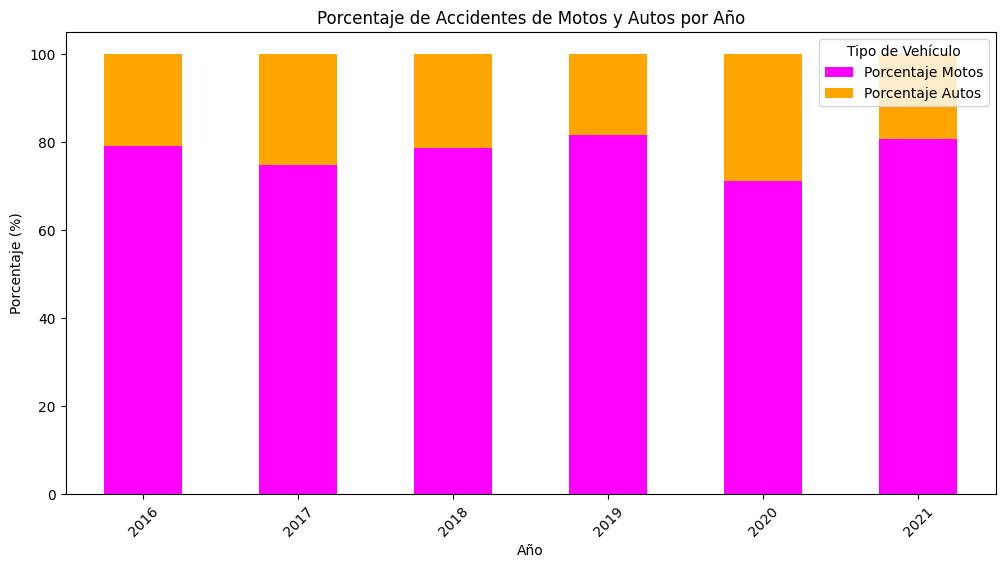

In [112]:
# Filtrar los accidentes de motos y autos
accidentes_motos = hechos_df[hechos_df['VICTIMA'] == 'MOTO']
accidentes_autos = hechos_df[hechos_df['VICTIMA'] == 'AUTO']

# Agrupar y contar accidentes de motos por año
accidentes_motos_por_anio = accidentes_motos['AÑO'].value_counts().sort_index()

# Agrupar y contar accidentes de autos por año
accidentes_autos_por_anio = accidentes_autos['AÑO'].value_counts().sort_index()

# Crear un DataFrame con los datos de accidentes de motos y autos por año
data = pd.DataFrame({'Motos': accidentes_motos_por_anio, 'Autos': accidentes_autos_por_anio})

# Calcular el porcentaje de accidentes de motos y autos por año
data['Porcentaje Motos'] = (data['Motos'] / (data['Motos'] + data['Autos'])) * 100
data['Porcentaje Autos'] = (data['Autos'] / (data['Motos'] + data['Autos'])) * 100

# Crear un gráfico de barras apiladas
ax = data[['Porcentaje Motos', 'Porcentaje Autos']].plot(kind='bar', stacked=True, figsize=(12, 6), color = ['fuchsia','orange',])
plt.title('Porcentaje de Accidentes de Motos y Autos por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.legend(title='Tipo de Vehículo')
plt.show()


Este grafico nos muestra que en todos los años estudiados en este dataset (2016 - 2021) se podria resumir que los accidentes de motocicletas rondan entre el 75 y 80% de los accidentes viales.

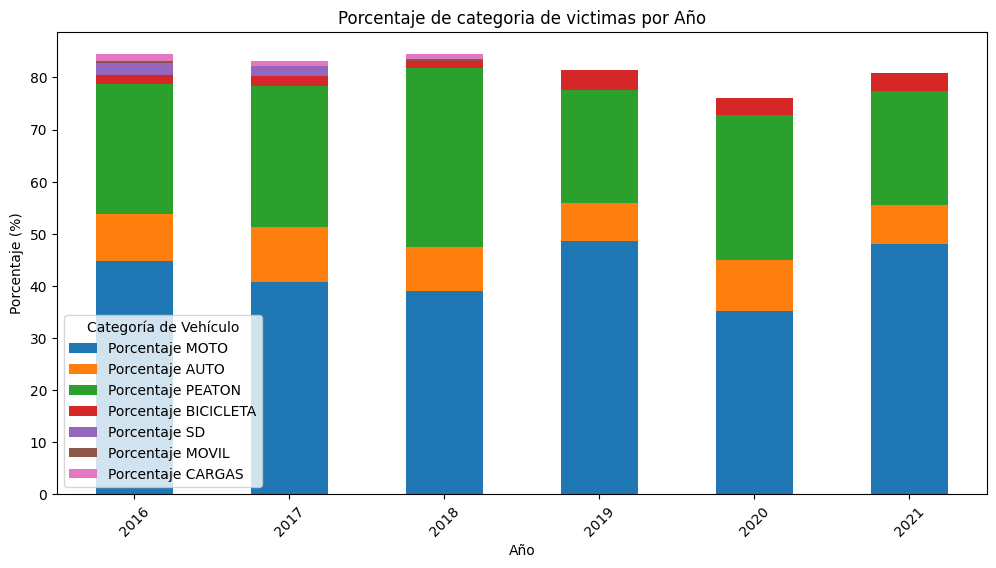

In [113]:
# Filtro accidentes por categoría de vehículo
categorias_vehiculos = ['MOTO', 'AUTO', 'PEATON', 'BICICLETA', 'SD', 'MOVIL', 'CARGAS']
data = {}

for categoria in categorias_vehiculos:
    accidentes_categoria = hechos_df[hechos_df['VICTIMA'] == categoria]
    accidentes_categoria_por_anio = accidentes_categoria['AÑO'].value_counts().sort_index()
    data[categoria] = accidentes_categoria_por_anio

# Creo DataFrame con los datos de accidentes por categoría de vehículo y por año
df = pd.DataFrame(data)

# Calculo los porcentajes por categoría de vehículo para cada año
for categoria in categorias_vehiculos:
    df[f'Porcentaje {categoria}'] = (df[categoria] / df.sum(axis=1)) * 100

# Creo un gráfico de barras apiladas
ax = df[[f'Porcentaje {categoria}' for categoria in categorias_vehiculos]].plot(
    kind='bar', stacked=True, figsize=(12, 6)
)
plt.title('Porcentaje de categoria de victimas por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.legend(title='Categoría de Vehículo')
plt.show()


En este grafico vemos los vehiculos en donde viajaban las victimas, detallado por año. Se puede observar una mayoria de peatones y motociclistas.

In [ ]:
#Para trabajar en PowerBI, importo las dos pestanias a excel separados.
victimas_df.to_excel('victimas.xlsx', index=False)
hechos_df.to_excel('hechos.xlsx', index=False)

